# WeatherPy
---

### Generate and Clean Data
##### The majority of code in this section sourced from starter_code.ipynb.
##### Code sections written by author will be stated in comments

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Creates a list of cities using citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


### Retreives Weather Data and stores it in a CSV file

In [3]:
# Set the API base URL
# --Code written by author--
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # --Code written by author--
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # --Code written by author--
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # --Code written by author--
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | dicabisagan
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | balabac
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | sisimiut
Processing Record 7 of Set 1 | shibetsu
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | nelson bay
Processing Record 10 of Set 1 | qandahar
City not found. Skipping...
Processing Record 11 of Set 1 | daru
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | pizarro
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | mahaicony
City not found. Skipping...
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | frontera
Processing Record 19 of Set 1 | pakokku
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | wak

In [4]:
# Creates dataframe of each city and sets the columns
# --Code written by author--
city_data_json_col = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
city_data_df = pd.DataFrame(city_data, columns = city_data_json_col)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,16.49,76,100,2.46,ZA,1683658459
1,dicabisagan,17.0818,122.4157,25.36,91,100,2.60,PH,1683658656
2,dunedin,-45.8742,170.5036,8.22,96,100,3.98,NZ,1683658656
3,balabac,7.9868,117.0645,27.64,81,79,2.25,PH,1683658656
4,rikitea,-23.1203,-134.9692,23.88,60,100,9.31,PF,1683658656


In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("Data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,16.49,76,100,2.46,ZA,1683658459
1,dicabisagan,17.0818,122.4157,25.36,91,100,2.60,PH,1683658656
2,dunedin,-45.8742,170.5036,8.22,96,100,3.98,NZ,1683658656
3,balabac,7.9868,117.0645,27.64,81,79,2.25,PH,1683658656
4,rikitea,-23.1203,-134.9692,23.88,60,100,9.31,PF,1683658656


## Scatter Plots
##### All data below written by author

#### Latitude vs Temperature

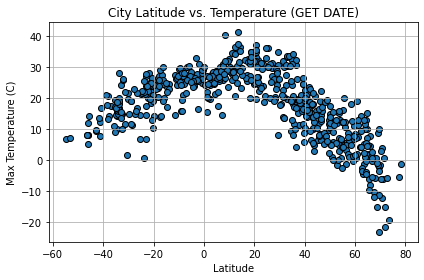

In [7]:
# Stores values for temperature and latitude
temperature = city_data_df["Max Temp"]
latitude = city_data_df["Lat"]
# get today's date

# Creates a scatter plot of latitude vs temperature
fig1, ax1 = plt.subplots()

ax1.scatter(latitude, temperature, edgecolors = "black") 

ax1.set_title("City Latitude vs. Temperature (GET DATE)")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (C)")
ax1.grid()

plt.tight_layout()
plt.savefig("Figures/Fig1_lat_v_temp.png")
plt.show()

#### Latitude vs. Humidity

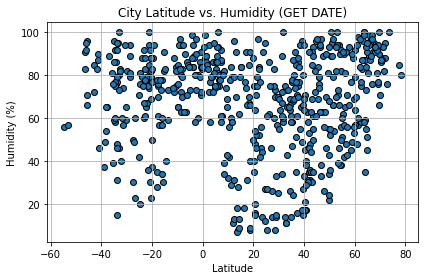

In [8]:
# Stores humidity data
humidity = city_data_df["Humidity"]

# Creates a scatter plot of humidity vs latitude
fig2, ax2 = plt.subplots()


ax2.scatter(latitude, humidity, edgecolors = "black") 

ax2.set_title("City Latitude vs. Humidity (GET DATE)")
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity (%)")
ax2.grid()

plt.tight_layout()
plt.savefig("Figures/Fig2_lat_v_humid.png")
plt.show()

#### Latitude vs Cloudiness

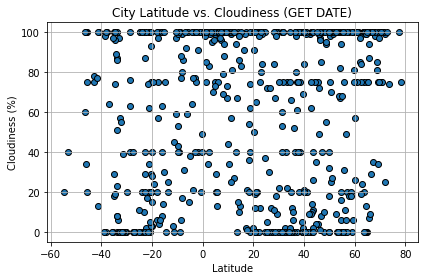

In [9]:
# Stores cloudiness data
cloudiness = city_data_df["Cloudiness"]

# Creates a scatter plot of cloudiness vs latitude
fig3, ax3 = plt.subplots()


ax3.scatter(latitude, cloudiness, edgecolors = "black") 

ax3.set_title("City Latitude vs. Cloudiness (GET DATE)")
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness (%)")
ax3.grid()

plt.tight_layout()
plt.savefig("Figures/Fig3_lat_v_cloud.png")
plt.show()

#### Latitude vs. Wind Speed

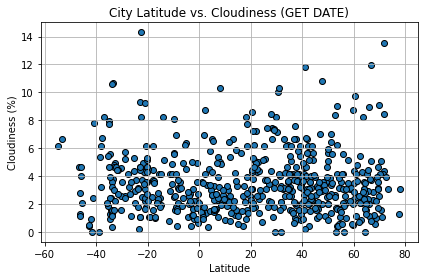

In [10]:
# Stores wind speed data
wind_speed = city_data_df["Wind Speed"]

# Creates a scatter plot of wind speed vs latitude
fig4, ax4 = plt.subplots()


ax4.scatter(latitude, wind_speed, edgecolors = "black") 

ax4.set_title("City Latitude vs. Cloudiness (GET DATE)")
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Cloudiness (%)")
ax4.grid()

plt.tight_layout()
plt.savefig("Figures/Fig4_lat_v_wind.png")
plt.show()

## Statistics

In [11]:
# A function to calculate the linear regression of two variables and produces a scatter
#   plot with the linear regression line
# ---------------------------------------------

# The function accepts:
# lat_hem : the hemisphere and latitude
# weather_param : the variable being compared to latitude
# weather_param_name : name of the variable compared
# ann_[xy] : the xy coords for the regression line equation
# filename : the name of the output file (.png not needed in name)

def lin_regress_plot(lat_hem, weather_param, weather_param_name, ann_x, ann_y, filename):
    # Calculates the linear regression
    slope, int, rvalue, pvalue, stderr = linregress(lat_hem, weather_param)
    y_values = slope * lat_hem + int
    line_eq = (f"y = {round(slope, 2)}x + {round(int,2)}")
    print(f"The r-value is {rvalue}")
    print("The p-value is " + "{:.2e}".format(pvalue))

    # Plots the correlation with regression line
    fig_fun, ax_fun = plt.subplots()

    ax_fun.scatter(lat_hem, weather_param, edgecolors = "black") 
    ax_fun.plot(lat_hem, y_values, color = 'r', linewidth = 3)

    ax_fun.set_title(f"Latitude vs. {weather_param_name} (GET DATE)")
    ax_fun.set_xlabel("Latitude")
    ax_fun.set_ylabel(weather_param_name)
    ax_fun.annotate(line_eq, (ann_x, ann_y), color = "red", fontsize = 12)

    plt.tight_layout()
    plt.savefig(f"Figures/{filename}.png")
    plt.show()

In [12]:
# Filters out northern and southern latitudes
north_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
south_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Stores all northern and southern latitudes
lat_N = north_hemisphere["Lat"]
lat_S = south_hemisphere["Lat"]

#### Latitude and Temperature Regression

The r-value is -0.8266953440854978
The p-value is 1.07e-101


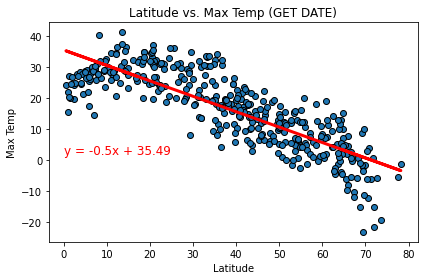

In [13]:
# All max temps in the northern hemisphere
temp_N = north_hemisphere["Max Temp"]

# Calculates and plots the regression line
lin_regress_plot(lat_N, temp_N, "Max Temp", 0, 2, "Fig5_Temp_N")

The r-value is 0.7176516028544875
The p-value is 4.27e-30


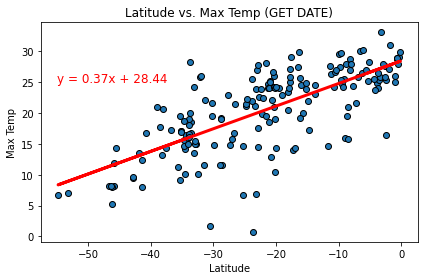

In [14]:
# All max temps in the southern hemisphere
temp_S = south_hemisphere["Max Temp"]

# Calculates and plots the regression line
lin_regress_plot(lat_S, temp_S, "Max Temp", -55, 25, "Fig6_Temp_S")

#### Discussion
The northern hemisphere regression sees a negative correlation with temperatures decreasing as you increase latitude away from the equator. This is a significant finding with a p-value of 1.07 * 10<sup>-101</sup>.

The southern hemisphere sees a reverse relationship to the northern, but follows the same pattern as the northern hemisphere. There is a positive correlation with temperatures increaing as latitude increases to 0. The p-value if 4.27*10<sup>-20</sup>.

#### Latitude and Humidity Regression

The r-value is 0.1871719424605907
The p-value is 1.63e-04


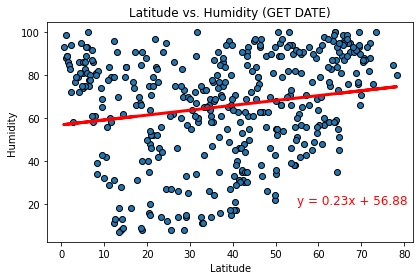

In [15]:
# All humidity records in the northern hemisphere
humid_N = north_hemisphere["Humidity"]

# Calculates and plots the regression line
lin_regress_plot(lat_N, humid_N, "Humidity", 55, 20, "Fig7_humid_N")

The r-value is 0.16088063573813655
The p-value is 3.00e-02


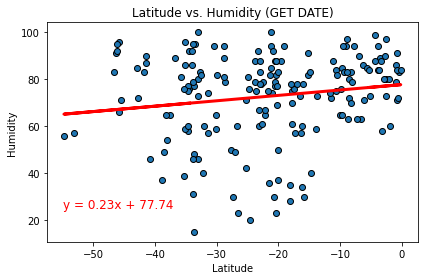

In [16]:
# All humidity records in the southern hemisphere
humid_S = south_hemisphere["Humidity"]

# Calculates and plots the regression line
lin_regress_plot(lat_S, humid_S, "Humidity", -55, 25, "Fig8_humid_S")

#### Discussion
Humidity in the Northern Hemisphere has an r-value of 0.187 suggesting a weak, but positive correlation with increasing latitude. This finding is significant with a p-value of 1.63*10<sup>-4</sup>. 

The southern hemisphere follows this pattern with an r-value of 0.161 and a p-value of 3.00 * 10<sup>-2</sup>. Humidity increases as latitude increases to 0, but humidity may not differ between the Northern and Southern hemispheres as they see similar lines of regression.

#### Latitude and Cloudiness Regression

The r-value is -0.012628660950573646
The p-value is 8.01e-01


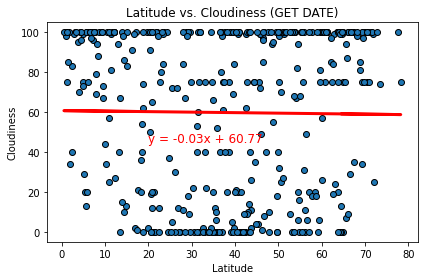

In [17]:
# All cloud records in the northern hemisphere
cloud_N = north_hemisphere["Cloudiness"]

# Calculates and plots the regression line
lin_regress_plot(lat_N, cloud_N, "Cloudiness", 20, 45, "Fig9_cloud_N")

The r-value is 0.16174607245228112
The p-value is 2.92e-02


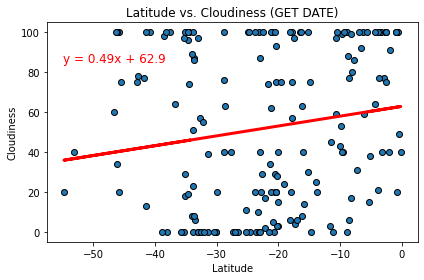

In [18]:
# All cloud records in the southern hemisphere
cloud_S = south_hemisphere["Cloudiness"]

# Calculates and plots the regression line
lin_regress_plot(lat_S, cloud_S, "Cloudiness", -55, 85, "Fig10_cloud_S")

#### Discussion
The northern hemisphere regression sees a negative correlation with temperatures decreasing as you increase latitude away from the equator. This is a significant finding with a p-value of 1.07 * 10<sup>-101</sup>.

The southern hemisphere sees a reverse relationship to the northern, but follows the same pattern as the northern hemisphere. There is a positive correlation with temperatures increaing as latitude increases to 0. The p-value if 4.27*10<sup>-20</sup>.

#### Latitude and Wind Speed Regression

The r-value is 0.0010357670771871058
The p-value is 9.84e-01


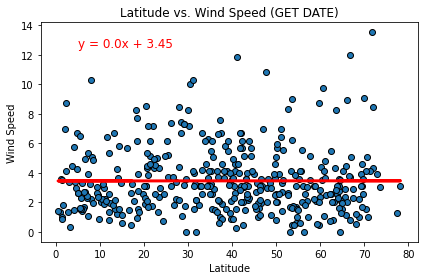

In [19]:
# All wind records in the northern hemisphere
wind_N = north_hemisphere["Wind Speed"]

# Calculates and plots the regression line
lin_regress_plot(lat_N, wind_N, "Wind Speed", 5, 12.5, "Fig11_wind_N")

The r-value is -0.136528570592458
The p-value is 6.61e-02


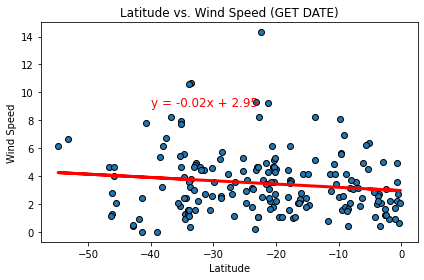

In [20]:
# All wind records in the northern hemisphere
wind_S = south_hemisphere["Wind Speed"]

# Calculates and plots the regression line
lin_regress_plot(lat_S, wind_S, "Wind Speed", -40, 9, "Fig12_wind_S")